In [1]:
%reset 

In [2]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dir = 'C:\\Users\\User\\OneDrive\\Desktop\\lucidRecords\\recordings_openBCI';
filename = "OpenBCI-BDF-2023-04-20_07-10-24 frustration run & old baby_edited";
# Assumes 4 channles in this order: EOG, EEG, EMG-NOSTRIL, EMG-CHIN 
subj_age = 33;
subj_isMale = True;
eeg_location_name = 'F';

emg_highpass_cut = 30;
emg_lowpass_cut = 10;

In [4]:
raw_bdf = mne.io.read_raw_bdf(f"{dir}\\{filename}.bdf",preload=True)
raw_bdf
mne.rename_channels(raw_bdf.info, {'EEG 1' : "EOG",
                              'EEG 2' : eeg_location_name,
                              'EEG 3' : "Nostr",
                              'EEG 4' : "Chin"})
raw_bdf.set_channel_types(      {"EOG": 'eog',
                              eeg_location_name : 'eeg',
                              "Nostr":'emg',
                              "Chin":'emg'})

print('The channels are:', raw_bdf.ch_names)
print('The sampling frequency is:', raw_bdf.info['sfreq'])

emg_only_fast = raw_bdf.copy().pick_types(meg=False, emg=True)
emg_only_slow = raw_bdf.copy().pick_types(meg=False, emg=True)
eeg_eog_only = raw_bdf.copy().pick_types(meg=False, eeg=True,eog=True)

emg_only_fast = emg_only_fast.notch_filter([50],picks='emg')
emg_only_slow = emg_only_slow.notch_filter([50],picks='emg')
eeg_eog_only = eeg_eog_only.notch_filter([50],picks=['eeg','eog'])

eeg_eog_only = eeg_eog_only.filter(0.3, 35,picks=['eeg','eog'])

emg_only_fast = emg_only_fast.filter(None,emg_highpass_cut,picks='emg')
emg_only_slow = emg_only_slow.filter(emg_lowpass_cut, None,picks='emg')

mne.rename_channels(emg_only_fast.info, {'Nostr' : f"Nostr_hp{emg_highpass_cut}",
                                        "Chin": f"Chin_hp{emg_highpass_cut}"})
mne.rename_channels(emg_only_slow.info, {'Nostr' : f"Nostr_lp{emg_lowpass_cut}",
                                        "Chin": f"Chin_lp{emg_lowpass_cut}"})

Extracting EDF parameters from C:\Users\User\OneDrive\Desktop\lucidRecords\recordings_openBCI\OpenBCI-BDF-2023-04-20_07-10-24 frustration run & old baby_edited.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1042999  =      0.000 ...  5214.995 secs...
The channels are: ['EOG', 'F', 'Nostr', 'Chin']
The sampling frequency is: 200.0
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 sec)

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [5]:
filtered = eeg_eog_only.copy().pick_types(meg=False, eeg=True,eog=True)
filtered.add_channels(add_list=[emg_only_fast,emg_only_slow],force_update_info=True) # Notice! The merge is forced, therefore the hp/lp info is distorted in the info structure

<RawEDF | OpenBCI-BDF-2023-04-20_07-10-24 frustration run & old baby_edited.bdf, 6 x 1043000 (5215.0 s), ~47.8 MB, data loaded>

In [6]:
filtered.info.ch_names

['EOG', 'F', 'Nostr_hp30', 'Chin_hp30', 'Nostr_lp10', 'Chin_lp10']

In [7]:
mne.export.export_raw(f"{dir}\\{filename}_filtered.edf", filtered,fmt='edf',overwrite=True)

Overwriting existing file.


Yasa automated scoring

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
26-Apr-23 12:41:07 | WARNING | Hypnogram is SHORTER than data by 25.00 seconds. Padding hypnogram with last value to match data.size.


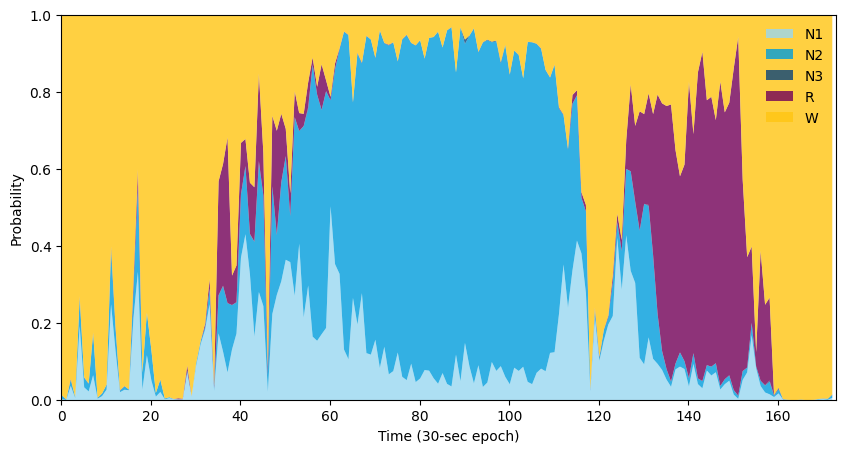

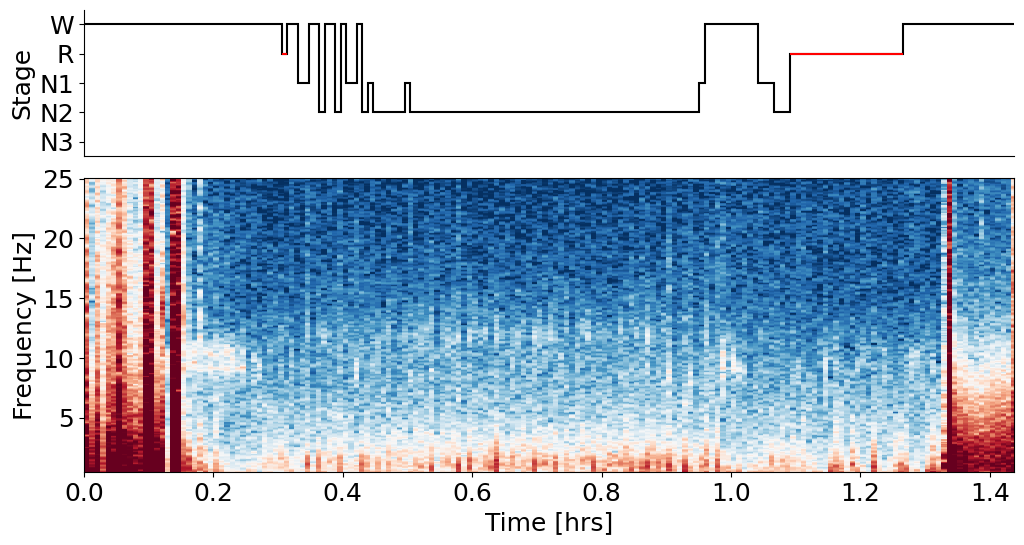

In [8]:
# predict using eeg, eog, chin_emg
sls = yasa.SleepStaging(filtered, eeg_name=eeg_location_name, eog_name='EOG', emg_name= f"Chin_hp{emg_highpass_cut}", metadata=dict(age=subj_age, male=subj_isMale))
y_pred = sls.predict()
sls.plot_predict_proba();

new_format_score = np.zeros((len(y_pred),3), dtype=object)
for ind, score in enumerate(y_pred):
        new_format_score[ind,:] = [30*ind,30,y_pred[ind]] ## onset (sec), duration, desc

np.savetxt(f"{dir}\\{filename}_autoScore.txt", new_format_score, delimiter='\t',fmt='%s')

data = filtered.get_data()
hypno_pred = yasa.hypno_str_to_int(y_pred)  # Convert "W" to 0, "N1" to 1, etc
hypno_up = yasa.hypno_upsample_to_data(hypno_pred, sf_hypno=1/30, data=raw_bdf)
yasa.plot_spectrogram(data[1,:], raw_bdf.info['sfreq'],hypno_up);  #            NOTICE!: make sure channel 1 is eeg
#yasa.plot_hypnogram(hypno_pred);  # Plot

26-Apr-23 12:41:08 | INFO | Using pre-trained classifier: c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\yasa\classifiers\clf_eeg+demo_lgb_0.5.0.joblib
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
26-Apr-23 12:41:08 | WARNING | Hypnogram is SHORTER than data by 25.00 seconds. Padding hypnogram with last value to match data.size.


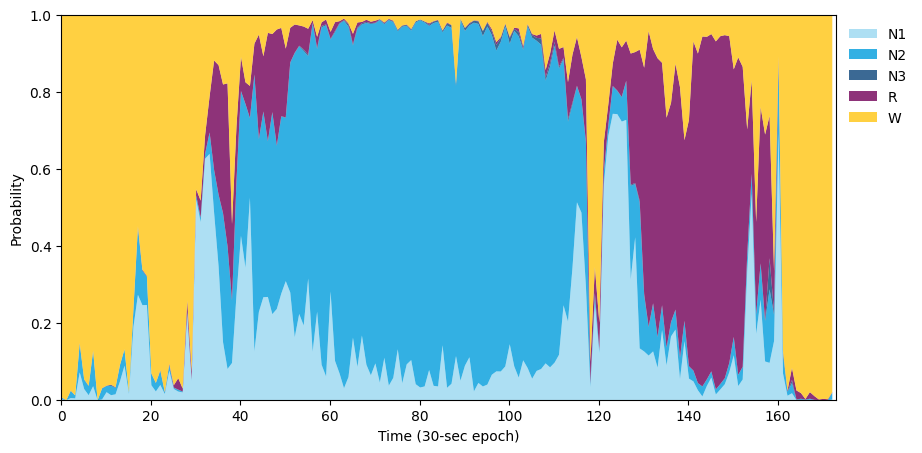

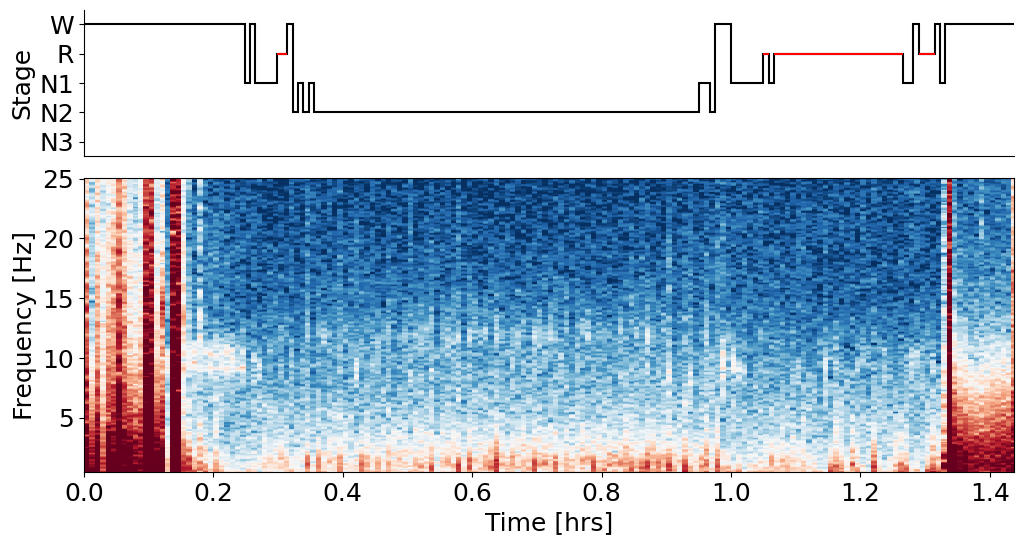

In [9]:
# predict using eeg only
sls = yasa.SleepStaging(filtered, eeg_name=eeg_location_name, metadata=dict(age=subj_age, male=subj_isMale))
y_pred = sls.predict()
sls.plot_predict_proba();

new_format_score = np.zeros((len(y_pred),3), dtype=object)
for ind, score in enumerate(y_pred):
        new_format_score[ind,:] = [30*ind,30,y_pred[ind]] ## onset (sec), duration, desc

np.savetxt(f"{dir}\\{filename}_EEGautoScore.txt", new_format_score, delimiter='\t',fmt='%s')

data = filtered.get_data()
hypno_pred = yasa.hypno_str_to_int(y_pred)  # Convert "W" to 0, "N1" to 1, etc
hypno_up = yasa.hypno_upsample_to_data(hypno_pred, sf_hypno=1/30, data=raw_bdf)
yasa.plot_spectrogram(data[1,:], raw_bdf.info['sfreq'],hypno_up);  #            NOTICE!: make sure channel 1 is eeg
#yasa.plot_hypnogram(hypno_pred);  # Plot
